# Exercise 1 - Ordinary Least Squares (20 Points)

The first exercise is about linear models.
The given data set contains prices and other attributes of approximately 54,000 diamonds. You should fit a linear model to predict the price of a diamond, given its attributes.

This exercise is meant to get you started with the tool stack. Besides numpy and matplotlib we use the following python packages:

- [pandas](https://pandas.pydata.org/)
- [sklearn](http://scikit-learn.org/)

If you are unfamiliar with them, follow the documentation links. In the event of a persistent problem, do not hesitate to contact the course instructors.

- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        28.04.2021
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=18310)


## Preprocessing

We use the same notation as in the lecture.
- $m$... Number of datapoints
- $n$... Number of features

### Dataset 

As a dataset, we use the famous [diamond dataset](https://www.kaggle.com/shivam2503/diamonds).

Each element in this dataset represents a diamond and has the following features:

- price: price in US dollars (326.0 - 18823.0)
- carat: weight of the diamond (0.2 - 5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0-10.74)
- y: width in mm (0-58.9)
- z: depth in mm (0-31.8)
- depth: total depth percentage = 2 * z / (x + y) (43-79)
- table: width of top of diamond relative to widest point (43-95)

The dataset is stored under `diamonds.csv`.

### Task 1 (1 Point)
Import the data from the file using [pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and examine it.

Determine the following:

* The number of data points
* The column names
* The data types for each column

In [7]:
import pandas as pd
import numpy as np

# TODO: load data
data = pd.read_csv('diamonds.csv')

# TODO: determine number of datapoints
n_data = data.shape[0]
print(f'Number of datapoints: {data.shape[0]}')

# TODO: determine column names
col_names = list(data.keys())
print(f'Column names: {col_names}')

# TODO: determine datatypes of columns
dtypes = data.dtypes
print(f'Datatypes:\n{dtypes}')

Number of datapoints: 53940
Column names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Datatypes:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [2]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Task 2 (1 Point)

Since there are discrete variables and we do not yet know how to include them into our regression model, remove them. Additionally, verify that there are no missing values in our dataset.

Hint: there are multiple ways to [check](https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345) for missing values

In [8]:
# TODO: remove discrete variables + check for missing values
data = data.drop(columns=['cut', 'color', 'clarity'])
assert not np.isnan(data.values).any()
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


As discussed in the lecture, we should **standardize** the data, to make different scales comparable.

Standardization is defined for each feature $x_i$:

\begin{align}
\hat{x}_i = \cfrac{x_i-\mu_x}{\sigma_x}\,,
\end{align}
where $\mu_x$ and $\sigma_x$ are the empirical [mean](https://en.wikipedia.org/wiki/Mean) and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of the feature $x$.

### Task 3 (2 Points)

Convert the pandas dataframe to a numpy array and calculate the standardized data matrix $X$.

In [9]:
# TODO: calculate standardized data matrix X
X = data.to_numpy()
X = (X-np.mean(X, axis=0))/np.std(X, axis=0)

In [10]:
X.shape

(53940, 7)

### Task 4 (2 Points)

Scikit learn has an [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) of this preprocessing.

Use it to create a second standardized data matrix and compare this result with your result from Task 3.

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data.to_numpy())
X_scaled = scaler.transform(data.to_numpy())

assert np.all(np.isclose(X,X_scaled))

Visualizing correlation in your data often helps to build intuition and get a feeling of the deeper mojo in the set.

Here we want to use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) as a measure for correlation between two variables.

Let $x$ and $y$ be two variables of the unstandardized dataset (e.g. `carat` and `price`). The empirical Pearson correlation coefficient between $x$ and $y$ is defined as 

\begin{align}
r_{xy} = \cfrac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}\,,
\end{align}
where $\bar{x}$ and $\bar{y}$ are the respective empirical means.

### Task 5 (2 Points)

How does this definition translate to our standardized data matrix $X$?

Calculate the pairwise correlation matrix for our dataset. 

Visualize this correlation matrix and label the rows/columns.

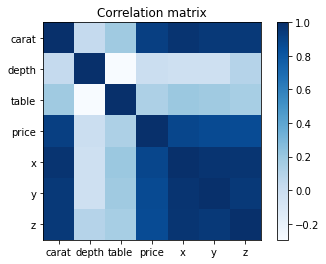

In [12]:
# TODO: calculate correlation matrix

m, n = X.shape
corr = 1/m * X.T@X

# TODO: Visualize correlation matrix
import matplotlib.pyplot as plt
plt.imshow(corr, cmap='Blues')
plt.xticks(np.arange(n), labels = data.keys())
plt.yticks(np.arange(n), labels = data.keys())
plt.title('Correlation matrix')
plt.colorbar()

## Linear Regression

The goal is to predict the `price` of a diamond based on some of its other features.

### Task 6 (1 Point)
Make a scatter plot of `carat` vs `price` using Matplotlib. Label the axes and give the plot a title.

Use the standardized dataset.

Text(0.5, 1.0, 'Carat vs. Price')

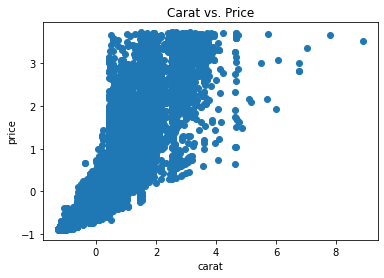

In [13]:
# TODO: display data in scatter plot
carats = X[:,0]
prices = X[:,3]
plt.scatter(carats, prices)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('Carat vs. Price')

### Task 7 (4 Points)

Implement a `LinReg` class, that uses maximum likelihood estimation (see the lecture script) to estimate $\theta$. Add the possibility to use [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression).

In [14]:
class LinReg():
    
    def __init__(self, c=0):
        # TODO: create attributes c, theta 
        self.c = c
        self.theta = None
    
    def fit(self, X, Y):
        # TODO: estimate theta
        self.theta = np.linalg.solve((X @ X.T) + self.c*np.eye(X.shape[0]), X @ Y)
        
    def predict(self, X):
        # TODO: predict labels
        return self.theta @ X
    

### Task 8 (2 Points)

Here you want to predict the `price` of a diamond solely from the variable `carat`. 
Set up the design matrix for this case and use your class to estimate $\theta$ on the dataset.
Note, that the design matrix does **not** need the vector of ones, since we standardized the dataset.

Plot the regression line defined by $\theta$.

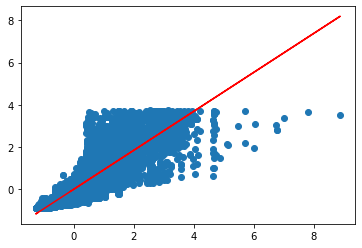

In [15]:
# TODO: build design matrix, y
dm = np.expand_dims(carats, axis=0)
y = prices

# TODO: use Linear Regression
lr = LinReg()
lr.fit(dm, y)

# TODO: plot data + regression line
preds = lr.predict(dm)
plt.scatter(carats, prices)
plt.plot(carats, preds, color='red')

### Task 9 (2 Points)

You can find an implementation of this method in the python module [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Use it and compare your result for the estimation of $\theta$.

In [16]:
# TODO: use scikit learn to estimate theta
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(dm.T, y)

# TODO: compare results
assert np.all(np.isclose(lr.theta, reg.coef_))

### Task 10 (3 Points)

Now predict the `price` from the variables `carat`, `depth`, `table`, `x`, `y`, `z`.

- Estimate $\theta$ with your class
- Estimate $\theta$ with scikit learn
- Compare both estimations

In [17]:
# TODO: build X, Y
dm = np.delete(X, 3, axis=1).T
y = prices

# TODO: estimate theta
lr = LinReg()
lr.fit(dm, y)
theta = lr.theta

# TODO: estimate theta using scikit-learn + compare
reg = LinearRegression(fit_intercept=False).fit(dm.T, y)
assert np.all(np.isclose(theta, reg.coef_))